# Garment workers Productivity data

BY: Rasha Alharthi

In [ ]:
# Importing all necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

# ML training and tuning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Loading and saving models
import pickle

import plotly.express as px

### About the dataset:

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- teamno : Associated team number with the instance
- noofworkers : Number of workers in each team
- noofstylechange : Number of changes in the style of a particular product
- targetedproductivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- overtime : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idletime : The amount of time when the production was interrupted due to several reasons
- idlemen : The number of workers who were idle due to production interruption
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

### Exploratory Data Analysis [EDA]

In [ ]:
# Loading dataset
df = pd.read_csv('garments_worker_productivity.csv')

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
# Selecting categorical columns
df.describe(exclude = 'number')

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [ ]:
# Check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# Find the missing values
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

## Feature Engineering

In [ ]:
zero_imputer = SimpleImputer( strategy='constant', fill_value=0)
df["wip"] = pd.Series(zero_imputer.fit_transform(np.array(df["wip"]).reshape(1, -1)).reshape(-1))

In [ ]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' ) #fix the space issue in finishing and the spelling of sewing

In [ ]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [ ]:
df.department.value_counts() 

sewing       940
finishing    257
Name: department, dtype: int64

In [ ]:
df['day'].value_counts() #Friday is not a working day

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [ ]:
df.team.value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [ ]:
df.targeted_productivity.value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [ ]:
df.smv.value_counts()

3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: smv, Length: 70, dtype: int64

In [ ]:
df.idle_time.value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [ ]:
df.idle_men.value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [ ]:
df.no_of_style_change.value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [ ]:
df.actual_productivity.value_counts()

0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

In [ ]:
# Convert department and day of week to numeric
#df["department"] = [0 if x == "sewing" else 1 for x in df["department"]]
#day_to_num = {"Sunday" : 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6}
#df["day"] = [day_to_num[x] for x in df["day"]]

In [ ]:
# Convert quarter to numeric
#df["quarter"] = [int(x[-1]) for x in df["quarter"]]

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,0,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,1,4,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,0,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,0,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,0,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### EDA 

In [ ]:
# Finding the corelation between variables 

df.corr().style.background_gradient(cmap='coolwarm')

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


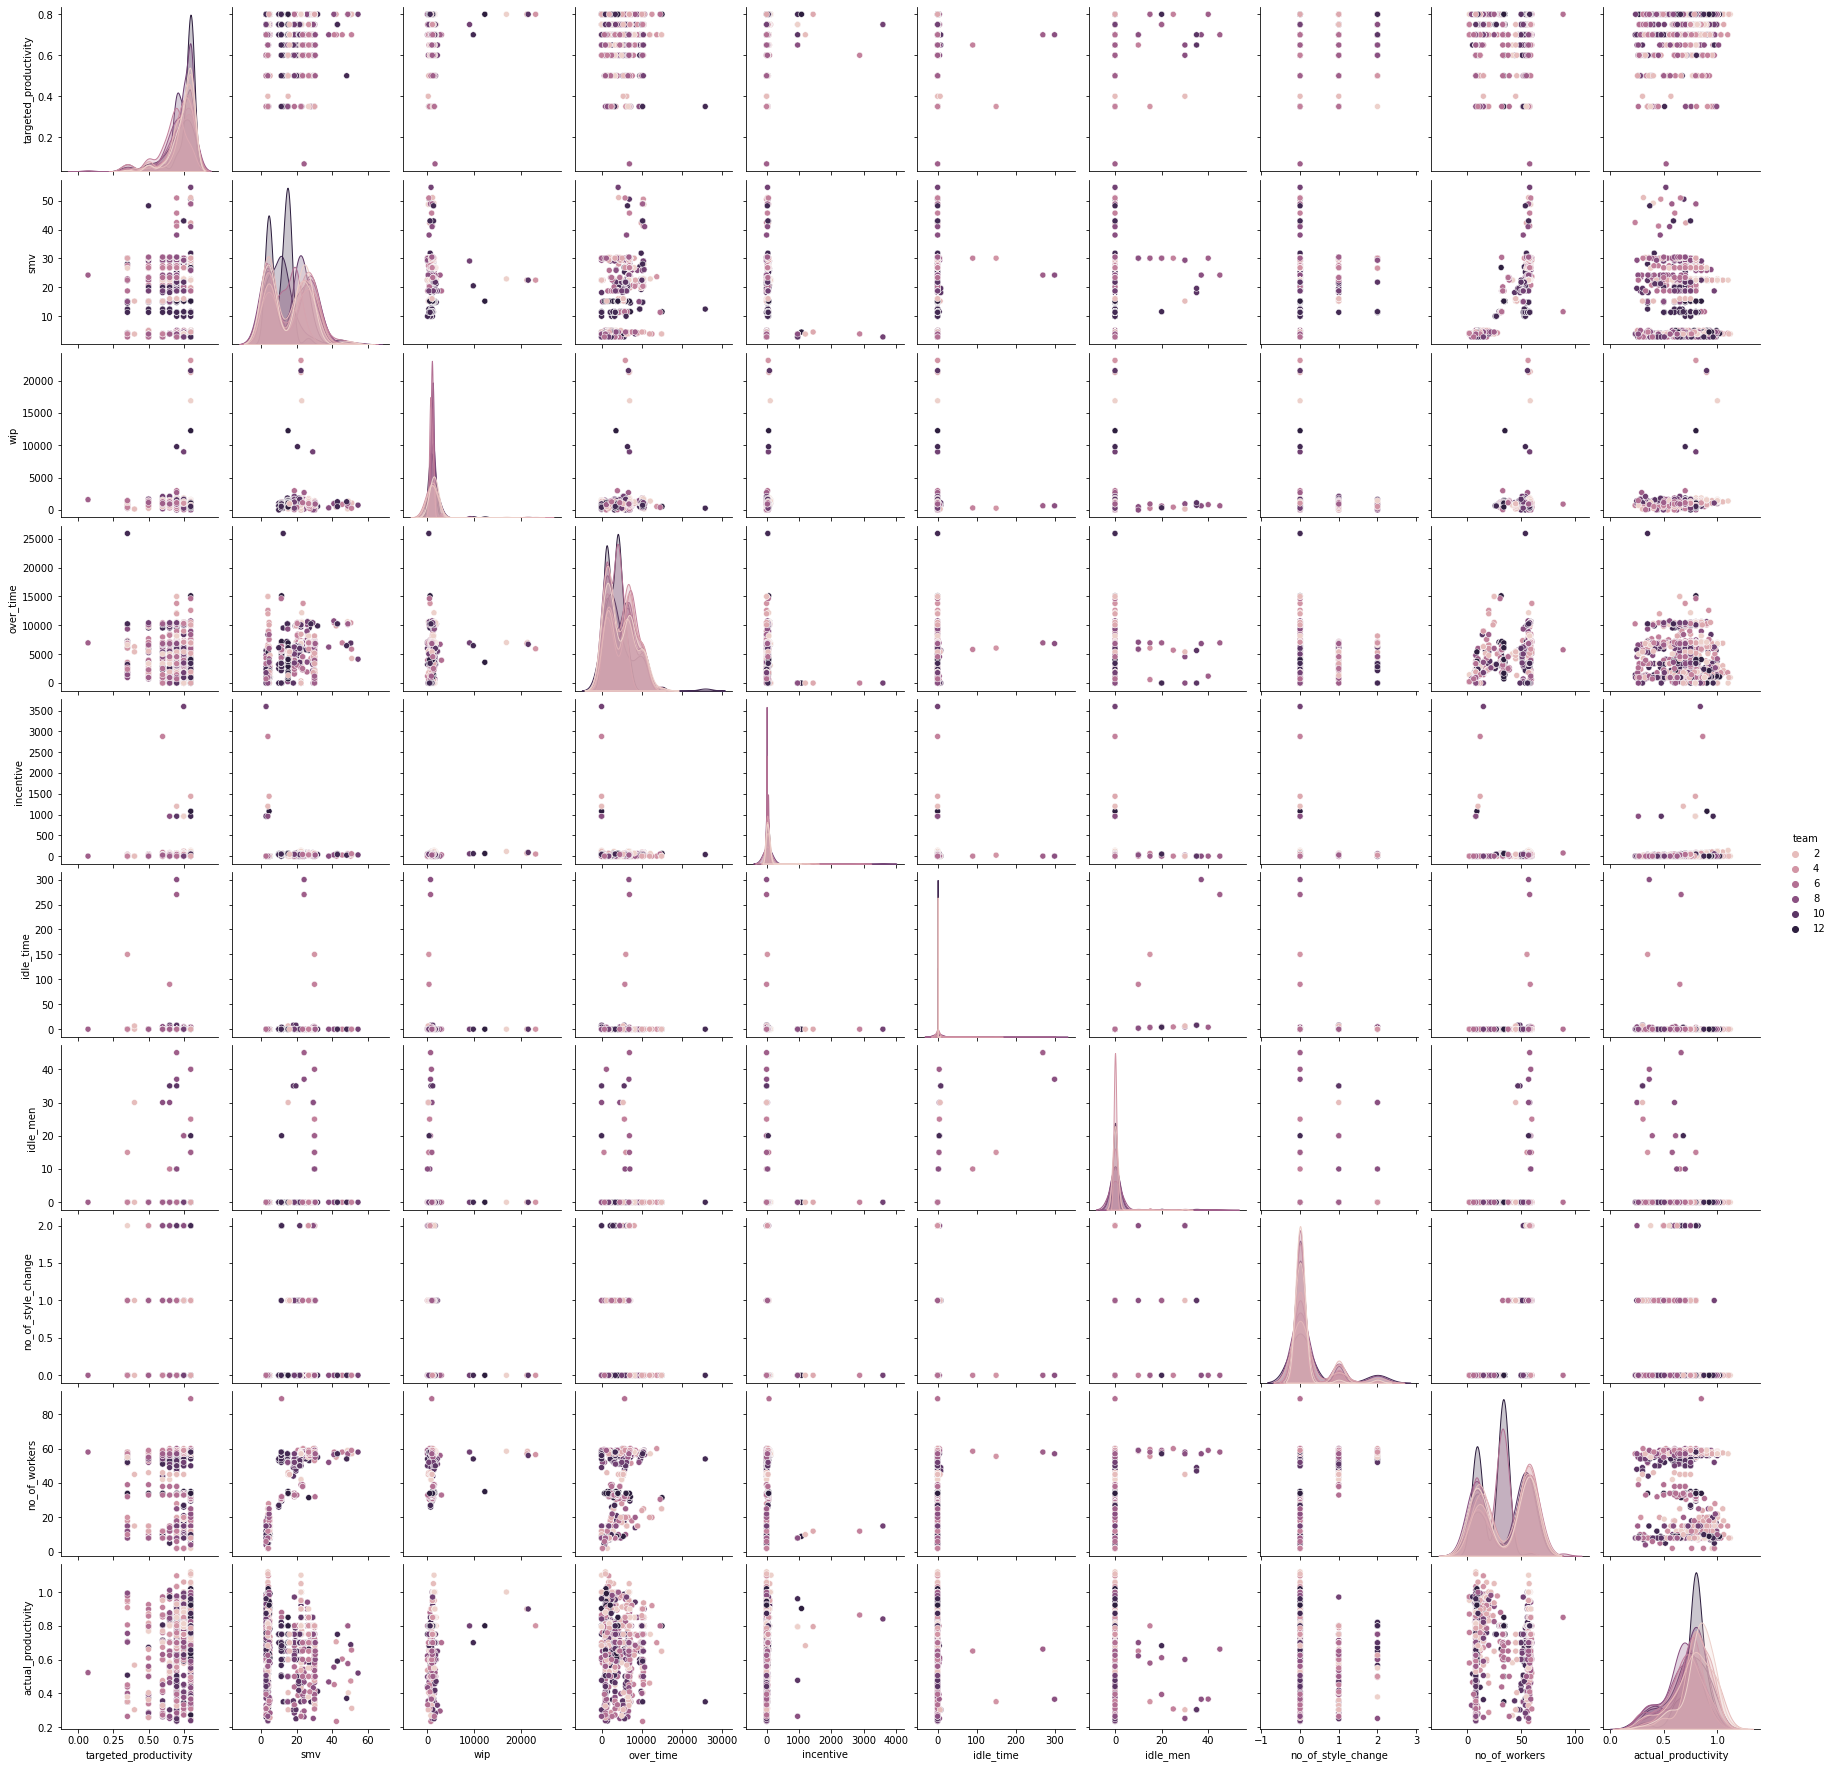

In [ ]:
sns.pairplot(df, hue = "team")

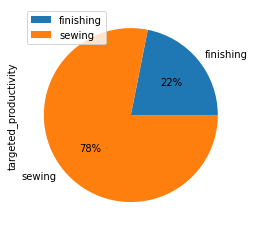

In [ ]:
df.groupby(['department']).sum().plot( kind='pie', y='targeted_productivity', autopct='%1.0f%%')

In [ ]:
fig = px.bar(df, x="department", y="actual_productivity", barmode="group", color="department", facet_col="quarter")
fig

### Building Machine Learning Model 

In [ ]:
# Split dataset to features and target
# Note: Our target in this model is actual_productivity

X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

In [ ]:
# Encoding categorical features

le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [ ]:
X.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


In [ ]:
# Splitting the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 123)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:

X_train.shape, X_test.shape

((957, 14), (240, 14))

In [ ]:
X_test.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
156,1,1,0,1,11,0.80,4.15,0.0,1440,0,0.0,0,0,8.0
529,20,4,0,1,8,0.65,3.94,0.0,960,0,0.0,0,0,8.0
856,35,2,1,3,4,0.75,5.13,0.0,1920,0,0.0,0,0,8.0
895,38,3,1,0,8,0.70,29.40,1094.0,6840,40,0.0,0,2,57.0
35,19,0,0,1,10,0.70,4.15,0.0,960,0,0.0,0,0,8.0


In [ ]:
# Building a Linear regression model 
lr = LinearRegression()

lr.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
linear_pred = lr.predict(X_test_sc)

In [ ]:
# Regression report 
Adj_r2 = 1 - (1-r2_score(y_test, linear_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, linear_pred))
print("MSE:",mean_squared_error(y_test, linear_pred))
print("MAE:",mean_absolute_error(y_test, linear_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, linear_pred)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.3017222476866599
MSE: 0.019694815737282118
MAE: 0.10969078367419849
RMSE: 0.14033821908974803
Adjusted R Squared: 0.2582738542093854


In [ ]:
# Building a SVR model 

svr = SVR()
svr.fit(X_train_sc,y_train)
preds_svr = svr.predict(X_test_sc)


# Look at svr report
Adj_r2 = 1 - (1-r2_score(y_test, preds_svr)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, preds_svr))
print("MSE:",mean_squared_error(y_test, preds_svr))
print("MAE:",mean_absolute_error(y_test, preds_svr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds_svr)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.3382365528835377
MSE: 0.018664935420681848
MAE: 0.09981983463597124
RMSE: 0.13661967435432515
Adjusted R Squared: 0.29706016061851337


### Improving ML Model Using Grid Search

In [ ]:
# retrain Linear model using gid search

param_grid = {
                'fit_intercept':[True,False], 
                'normalize':[True,False], 
                }

gs = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=10, refit='neg_mean_squared_error')

In [ ]:
gs.fit(X_train_sc, y_train)
results = gs.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)

best params: LinearRegression(normalize=True)
best params: {'fit_intercept': True, 'normalize': True}
best score: 0.2574097541801025


In [ ]:
linear_pred=gs.predict(X_test_sc)

In [ ]:
# Regression report 
Adj_r2 = 1 - (1-r2_score(y_test, linear_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, linear_pred))
print("MSE:",mean_squared_error(y_test, linear_pred))
print("MAE:",mean_absolute_error(y_test, linear_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, linear_pred)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.3017222476866599
MSE: 0.019694815737282118
MAE: 0.1096907836741985
RMSE: 0.14033821908974803
Adjusted R Squared: 0.2582738542093854


In [ ]:
# retrain SVR model using gid search

param = {
         'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,10,1],
         }

svr_grids = GridSearchCV(SVR(),param, cv=10, refit='neg_mean_squared_error')

In [ ]:
svr_grids.fit(X_train_sc,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 10, 1],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             refit='neg_mean_squared_error')

In [ ]:
print("best params: " + str(svr_grids.best_estimator_))
print("best params: " + str(svr_grids.best_params_))
print('best score:', svr_grids.best_score_)

best params: SVR(C=1)
best params: {'C': 1, 'kernel': 'rbf'}
best score: 0.3631412756621989


In [ ]:
preds_svr = svr_grids.predict(X_test_sc)
# Look at svr report

Adj_r2 = 1 - (1-r2_score(y_test, preds_svr)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R Squared:",r2_score(y_test, preds_svr))
print("MSE:",mean_squared_error(y_test, preds_svr))
print("MAE:",mean_absolute_error(y_test, preds_svr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds_svr)))
print("Adjusted R Squared:",Adj_r2)

R Squared: 0.3382365528835377
MSE: 0.018664935420681848
MAE: 0.09981983463597124
RMSE: 0.13661967435432515
Adjusted R Squared: 0.29706016061851337


### **Since SVR Model gives me better result I will deploy it**

# Save ML Model, Scaler and Encoder

In [ ]:
# save the model, scaler and the encoder 

pickle.dump(le, open('../encoder.pkl', 'wb'))
pickle.dump(scaler, open('../scaler.pkl','wb'))
pickle.dump(svr_grids, open('../model.pkl','wb'))

In [ ]:
# Load just to check that model, scaler and encoder is working
encoder = pickle.load(open('../encoder.pkl', 'rb'))
scaler = pickle.load(open('../scaler.pkl', 'rb'))
model = pickle.load(open('../model.pkl', 'rb'))